In [1481]:
import numpy  as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

import warnings; warnings.simplefilter('ignore')


# Importation des données

In [1482]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
full = pd.concat([train, test], sort=False)

In [1483]:
train.shape

(891, 12)

In [1484]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1485]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [1486]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


On remarque qu'il nous manque des variables Age ! 

# Première analyse statistique

## Graphiquement

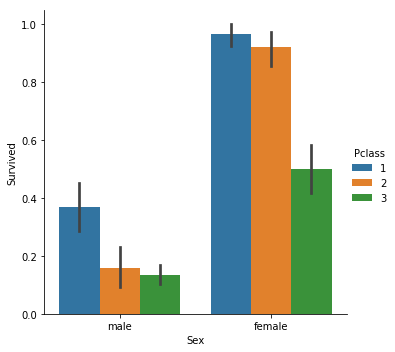

In [1487]:
sns.catplot(x='Sex', y='Survived', hue='Pclass', kind='bar', data=train)

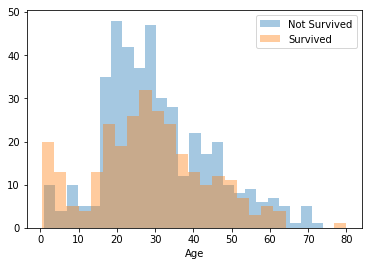

In [1488]:
sns.distplot(train['Age'][train['Survived']==0].dropna(axis=0), kde=False, bins=25,label= "Not Survived")
sns.distplot(train['Age'][train['Survived']==1].dropna(axis=0), kde=False, bins=25,label= "Survived")
plt.legend()

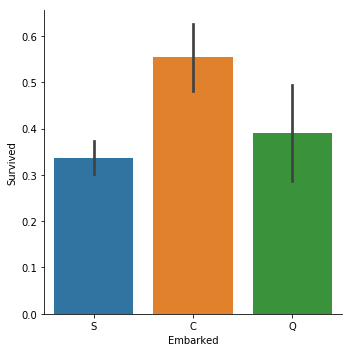

In [1489]:
sns.catplot(x='Embarked', y='Survived', kind='bar', data=train)

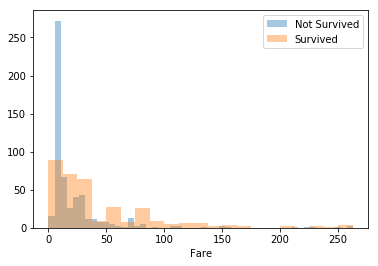

In [1490]:
sns.distplot(train['Fare'][train['Survived']==0][train['Fare']<300].dropna(axis=0), kde=False, label= "Not Survived")
sns.distplot(train['Fare'][train['Survived']==1][train['Fare']<300].dropna(axis=0), kde=False, label= "Survived")
plt.legend()

## Tableaux

In [1491]:
np.sum([train['Age']>=60])

26

In [1492]:
train[train['Age']>=60].groupby(['Sex', 'Pclass']).mean()

PassengerId  Survived        Age     SibSp  Parch       Fare
Sex    Pclass                                                              
female 1        491.000000  1.000000  61.666667  0.666667   0.00  77.736100
       3        484.000000  1.000000  63.000000  0.000000   0.00   9.587500
male   1        453.857143  0.142857  65.428571  0.214286   0.50  56.239886
       2        490.750000  0.250000  64.500000  0.250000   0.25  17.625000
       3        394.250000  0.000000  67.625000  0.000000   0.00   7.378125

Le sexe et la classe a aussi une importance chez les mineurs ! Seulement 23% des garçons de 3eme classe ont survécu, contre 54% des filles de troisième classe

In [1493]:
train[(train['Age']>=18)&(train['Age']<50)].groupby(['Sex', 'Pclass']).mean()

PassengerId  Survived        Age     SibSp     Parch  \
Sex    Pclass                                                         
female 1        473.887097  0.983871  32.225806  0.532258  0.500000   
       2        455.964286  0.910714  30.526786  0.517857  0.517857   
       3        422.060606  0.409091  28.189394  0.439394  0.909091   
male   1        452.220588  0.441176  35.551471  0.411765  0.205882   
       2        433.560000  0.066667  30.000000  0.360000  0.160000   
       3        463.840000  0.140000  28.450000  0.175000  0.110000   

                     Fare  
Sex    Pclass              
female 1       112.657461  
       2        21.660343  
       3        14.457892  
male   1        74.181557  
       2        21.247611  
       3        10.115433

On voit clairement l'impact de l'âge dans la chance de survie, 13% de survie chez les hommes de 3eme classe contre 23% chez les mineurs de la même classe. Et 42% de survie chez les femmes de 3eme classe contre 54% chez les mineurs de la même classe

# Création d'une nouvelle variable

## Variable Title

On va extraire le titre présent dans le nom des personnes

In [1494]:
import re
Title = np.array([])
for i in range (full.shape[0]):
    Title=np.append(Title, re.search(", [A-Za-z]*(\s[A-Za-z]*.|.)",full["Name"].values[i])[0][2:-1])

full['Title']= Title

In [1495]:
full['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Mlle              2
Ms                2
Major             2
Lady              1
Sir               1
Dona              1
the Countess      1
Mme               1
Jonkheer          1
Capt              1
Don               1
Name: Title, dtype: int64

Il y a trop de petits titres on va essayer de rassembler certains titres

In [1496]:
miss = pd.Series(['Ms', 'Mlle'])
royalty = pd.Series(['the Countess', 'Dona', 'Lady', 'Jonkheer', 'Sir'])
officer = pd.Series(['Dr', 'Rev', 'Col', 'Major', 'Don', 'Capt'])

full['Title'][full['Title'].isin(miss)] = 'Miss'
full['Title'][full['Title'].isin(royalty)] = 'royalty'
full['Title'][full['Title'].isin(officer)] = 'officer'

full['Title'][full['Title']=='Mme'] = 'Mrs'

## Variable FamilySize

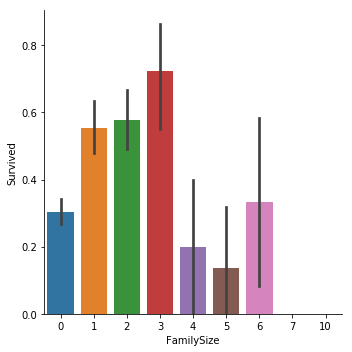

In [1497]:
full["FamilySize"] = full["SibSp"]+full["Parch"]
train_temp =full.loc[:890,:]

sns.catplot(x='FamilySize', y='Survived', kind='bar', data=train_temp)


On remarque que les chances de survie augmentent de manière significative pour les familles entre 1 et 3 personnes (donc des familles de 2 à 4 personnes). On peut donc créer une variable catégorielle en fonction de la taille de la famille.


In [1498]:
full['FSizeCat']=''

full['FSizeCat'][full['FamilySize']<2]= 'Small'
full['FSizeCat'][(full['FamilySize']>1 )& (full['FamilySize']<4)]= 'Medium'
full['FSizeCat'][full['FamilySize']>3]= 'Big'

# Comptabilisation et remplacement des NA

In [1499]:
full.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Title             0
FamilySize        0
FSizeCat          0
dtype: int64

Il manque évidemment 418 variables Survived correspondant au dataset test. Il manque 263 variables Age, 1 variables Fare et 2 variables Embarked qu'on pourra remplacer. Trop de NA dans la variable Cabin, on la supprime

## Remplacement NA dans Embarked

In [1500]:
full['Embarked'].groupby(full['Pclass']).value_counts()

Pclass  Embarked
1       S           177
        C           141
        Q             3
2       S           242
        C            28
        Q             7
3       S           495
        Q           113
        C           101
Name: Embarked, dtype: int64

L'embarquement dépend beaucoup de la classe, on peut remplacer les valeurs manquantes par les médianes pour chaque classe, il s'agit ici de S pour les 3 classes.

In [1501]:
full['Embarked'][full['Embarked'].isnull()] = 'S'

## Remplacement NA dans Fare

Il nous manque une valeur, on va remplacer par la valeur médiane du prix d'un ticket en fonction de la classe du passager en question.

In [1502]:
med = full['Fare'].groupby(full['Pclass']).median()
med

Pclass
1    60.0000
2    15.0458
3     8.0500
Name: Fare, dtype: float64

In [1503]:
full['Fare'][full['Fare'].isna()] = med[full['Pclass'][full['Fare'].isna()]]

In [1504]:
full.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
Title             0
FamilySize        0
FSizeCat          0
dtype: int64

## Remplacement NA dans Age

Le nom nous donne une bonne information sur l'âge des personnes, puisque le titre est présent dedans

In [1505]:
median_age = full['Age'].groupby(full['Title']).median()
median_age

Title
Master      4.0
Miss       22.0
Mr         29.0
Mrs        35.0
officer    49.0
royalty    39.0
Name: Age, dtype: float64

In [1506]:
full['Age'][full['Age'].isna()] = median_age[full['Title'][full['Age'].isna()]].values

## Création variable Child

In [1507]:
full['Child']=''
full['Child'][full['Age']<18]= 1
full['Child'][full['Age']>=18]= 0

# Suppression variables

In [1508]:
full = full.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1)


# Transformation des facteurs textes en chiffres

## Encodage ordinal

Transforme les facteurs en entier positif. Attention ce n'est pas toujours cohérent lorsqu'il y a plus de 2 facteurs, car cela introduit des relations d'ordres entre les facteurs (0,1,2,3...), l'encodage OneHot est dans ce cas une meilleur idée. Il semble cependant que l'encodage OneHot ne soit pas le meilleur dans certains cas, dans le cas du RandomForrest l'encodage ordinal semble fournir de meilleurs résultats

In [1509]:
from sklearn.preprocessing import LabelEncoder 

encoder = LabelEncoder()
full['Sex']=encoder.fit_transform(full['Sex'])  #1 si homme et 0 si femme


## Encodage OneHot

Création d'autant de variables binaires qu'il y a de facteur, une colonne par facteurs = 1 si facteur est présent, 0 sinon

### Variable Embarked

In [1510]:
from sklearn.preprocessing import LabelBinarizer

encoder=LabelBinarizer()
EmbarkedOH = pd.DataFrame(encoder.fit_transform(full['Embarked']), columns = ['C', 'Q', 'S'])
full =pd.concat([full.reset_index(), EmbarkedOH], axis=1, join='inner')  #axis = 1 on veut ajouter des colonnes et non des lignes

### Variable Title

In [1511]:

encoder=LabelBinarizer()
TitleOH = pd.DataFrame(encoder.fit_transform(full['Title']), columns=['Master','Miss','Mr','Mrs','officer','royalty'])
full =pd.concat([full.reset_index(), TitleOH], axis=1, join='inner')


## Variable FSizeCat

In [1512]:

encoder=LabelBinarizer()
FSizeCatOH = pd.DataFrame(encoder.fit_transform(full['FSizeCat']), columns=['Small', 'Medium', 'Big'])
full =pd.concat([full, FSizeCatOH], axis=1, join='inner')


## Encodage ordinal nécessaire pour certains algos

In [1513]:
encoder = LabelEncoder()
full['Embarked']=encoder.fit_transform(full['Embarked'])

encoder = LabelEncoder()
full['Title']=encoder.fit_transform(full['Title'])

encoder = LabelEncoder()
full['FSizeCat']=encoder.fit_transform(full['FSizeCat'])

In [1514]:
full = full.drop(['level_0', 'index'], axis=1)

# Normalisation des données (Pas utile pour tous les algos)

La normalisation n'est pas utile pour tous les algos, inutile pour Random Forest par exemple, mais pour certains elle augmente considérablement les résultats, comme pour l'ago KNN.

In [1515]:
from sklearn.preprocessing import RobustScaler


In [1562]:
full[['Age', 'Fare']]=RobustScaler().fit_transform(full[['Age', 'Fare']])
full.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,...,S,Master,Miss,Mr,Mrs,officer,royalty,Small,Medium,Big
0,0.0,3,"Braund, Mr. Owen Harris",1,-0.538462,1,0,-0.308146,2,2,...,1,0,0,1,0,0,0,0,0,1
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.692308,1,0,2.430755,0,3,...,0,0,0,0,1,0,0,0,0,1
2,1.0,3,"Heikkinen, Miss. Laina",0,-0.230769,0,0,-0.279274,2,1,...,1,0,1,0,0,0,0,0,0,1
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.461538,1,0,1.652999,2,3,...,1,0,0,0,1,0,0,0,0,1
4,0.0,3,"Allen, Mr. William Henry",1,0.461538,0,0,-0.273927,2,2,...,1,0,0,1,0,0,0,0,0,1


# Algorithmes

Tout d'abord on doit reséparer notre dataset entre la partie train et test

In [1517]:
train = full.loc[:890,:]
test = full.loc[891:, :]


In [1518]:
list(train)

['Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked',
 'Title',
 'FamilySize',
 'FSizeCat',
 'Child',
 'C',
 'Q',
 'S',
 'Master',
 'Miss',
 'Mr',
 'Mrs',
 'officer',
 'royalty',
 'Small',
 'Medium',
 'Big']

In [1519]:
X_train = train[['Pclass', 'Sex','Age', 'Fare', 'Child', 'C', 'Q', 'S', 'Master','Miss','Mr','Mrs','officer', 'royalty', 'Small', 'Medium','Big']]
y_train = train['Survived']

X_test = test[['Pclass', 'Sex', 'Fare','Age', 'Child', 'C', 'Q', 'S', 'Master','Miss','Mr','Mrs','officer', 'royalty', 'Small', 'Medium','Big']]

X_train_ordinal = train[['Pclass', 'Sex', 'Fare', 'FSizeCat', 'Child', 'Embarked', 'Title', 'Age']]
y_train_ordinal = train['Survived']

X_test_ordinal = test[['Pclass', 'Sex', 'Fare', 'FSizeCat', 'Child', 'Embarked', 'Title', 'Age']]

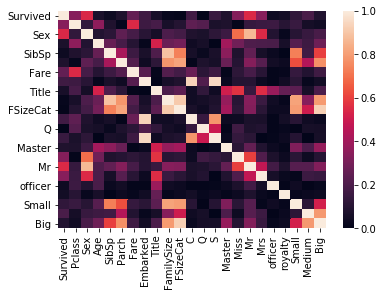

In [1520]:
sns.heatmap(abs(train.corr()))

In [1521]:
abs(train.corr())

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,...,S,Master,Miss,Mr,Mrs,officer,royalty,Small,Medium,Big
Survived,1.000000,0.338481,0.543351,0.072145,0.035322,0.081629,0.257307,0.167675,0.065661,0.016639,...,0.149683,0.085221,0.335636,0.549199,0.341994,0.036630,0.050561,0.125147,0.193662,0.089185
Pclass,0.338481,1.000000,0.131900,0.356148,0.083081,0.018443,0.549500,0.162098,0.186620,0.065997,...,0.074053,0.082081,0.010261,0.142698,0.153758,0.156795,0.105169,0.152366,0.058531,0.043796
Sex,0.543351,0.131900,1.000000,0.093722,0.114631,0.245489,0.182333,0.108262,0.057468,0.200988,...,0.119224,0.159934,0.693916,0.867334,0.550146,0.092629,0.020746,0.102954,0.144848,0.188116
Age,0.072145,0.356148,0.093722,1.000000,0.262078,0.184442,0.100213,0.018504,0.524695,0.271265,...,0.002962,0.406103,0.287302,0.203546,0.195696,0.191560,0.064443,0.226589,0.160673,0.278088
SibSp,0.035322,0.083081,0.114631,0.262078,1.000000,0.414838,0.159651,0.068230,0.206091,0.890712,...,0.068734,0.349559,0.083462,0.250489,0.061668,0.027753,0.001402,0.730691,0.171057,0.598391
Parch,0.081629,0.018443,0.245489,0.184442,0.414838,1.000000,0.216225,0.039798,0.118085,0.783111,...,0.060814,0.267344,0.100998,0.333905,0.223575,0.050632,0.031809,0.631523,0.444587,0.772284
Fare,0.257307,0.549500,0.182333,0.100213,0.159651,0.216225,1.000000,0.224719,0.011504,0.217138,...,0.162184,0.010908,0.119518,0.183766,0.107259,0.009385,0.018325,0.143636,0.090674,0.166672
Embarked,0.167675,0.162098,0.108262,0.018504,0.068230,0.039798,0.224719,1.000000,0.001319,0.066516,...,0.951474,0.031113,0.095310,0.099589,0.035000,0.011717,0.045542,0.110061,0.021147,0.049803
Title,0.065661,0.186620,0.057468,0.524695,0.206091,0.118085,0.011504,0.001319,1.000000,0.199849,...,0.042360,0.513199,0.574013,0.146306,0.556089,0.386150,0.259332,0.235225,0.058886,0.195918
FamilySize,0.016639,0.065997,0.200988,0.271265,0.890712,0.783111,0.217138,0.066516,0.199849,1.000000,...,0.077359,0.372472,0.107500,0.338014,0.153842,0.044263,0.016849,0.814901,0.339020,0.794800


## K-nearest neighbors 

In [1522]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate

In [1523]:
model = KNeighborsClassifier(n_neighbors=3)


                                        
model.fit(X_train, y_train)
print ('Train Score :', model.score(X_train, y_train))

Train Score : 0.8754208754208754


### Cross validation

Ici  nous avons testé notre prédiction sur le même dataset qui a permis au modèle de s'entraîner. Il nous faudrait donc pour être plus rigoureux découper notre dataset une troisième fois pour créer un validation set qui permettrait de comparer nos modèles. Cependant, qui nous dit que la manière de découper notre dataset n'aura pas une influence sur le score ! Pour éviter ce problème, il faut découper notre dataset plusieurs fois, en 5 parties par exemple, et effectuer notre prédiction sur 5 validation test différent puis effectuer la moyenne des 5 : c'est ce qu'on appelle la cross validation.

In [1524]:
CV = cross_validate(KNeighborsClassifier(n_neighbors=3), X_train, y_train, cv = 5)

val_score = CV['test_score'].mean()
val_score

0.7845873819547362

### Validation curve : trouver le paramètre K

In [1525]:
from  sklearn.model_selection import validation_curve

Score max = 0.8227590239972027  et nombre de voisin = 17


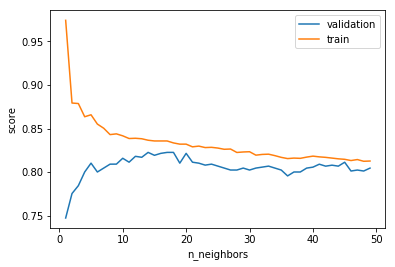

In [1526]:
model = KNeighborsClassifier()
k = np.arange(1,50)

train_score, val_score = validation_curve(model, X_train, y_train, 'n_neighbors', k, cv=5)

plt.plot (k, val_score.mean(axis=1), label='validation')
plt.plot (k, train_score.mean(axis=1), label='train')

plt.xlabel('n_neighbors')
plt.ylabel('score')
plt.legend()


print ("Score max =", max(val_score.mean(axis=1)), " et nombre de voisin =", np.argmax(val_score.mean(axis=1)))

On est clairement dans un cas d'overfitting, pour les premières valeurs de k, les résultats de prédictions sur le dataset train sont clairement supérieurs aux résultats du dataset de validation (obtenus par cross validation). Il y a donc **overfitting** : le modèle **s'est trop perfectionné sur le trainset et a perdu tout sens de généralisation**. 

### Pour aller plus loin : GridSearchCV 

Il y a d'autres paramètres qu'on peut essayer de changer dans l'algo de K neighbors, la métrique par exemple (Euclidienne, Manhattan ...)

In [1527]:
from sklearn.model_selection import GridSearchCV

In [1528]:
param_grid = {'n_neighbors' : np.arange(1,20), 'metric' : ['euclidean', 'manhattan', 'minkowski']}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]), 'metric': ['euclidean', 'manhattan', 'minkowski']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [1529]:
grid.best_score_

0.8316498316498316

In [1530]:
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 16}

Le meilleur modèle n'utilise donc pas la métrique euclidienne ! Mais la métrique Manhattan avec un nombre de voisins = 16

In [1531]:
best_model_neighbors = grid.best_estimator_
predict_knn = best_model_neighbors.predict(X_test).astype(int)

In [1532]:

f = open('knn_prediction.csv', 'w')
ligneEntete = 'Survived,PassengerID' + "\n"
f.write(ligneEntete)
for i in range(0, len(predict_knn)):
     ligne = str(predict_knn[i])+","+ str(test_complete.iloc[i,0]) +"\n"
     f.write(ligne)

f.close()

**Notre score avec le modèle KNN sur Kaggle est de 78,9%**

# Random Forrest

In [1533]:
X_train = X_train_ordinal
y_train = y_train_ordinal

X_test = X_test_ordinal

In [1534]:
from sklearn.ensemble import RandomForestClassifier

In [1535]:
CV_forest = cross_validate(RandomForestClassifier(), X_train, y_train, cv = 5)

val_score = CV_forest['test_score'].mean()
val_score

model=RandomForestClassifier()
model.fit(X_train, y_train)
predict_forest = model.predict(X_test).astype(int)

## Meilleurs paramètres

In [1536]:
param_grid= {'n_estimators': [100, 200, 300, 400], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth':[4,5,6,7,8], 'criterion' : ['gini', 'entropy']}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [100, 200, 300, 400], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [4, 5, 6, 7, 8], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [1537]:
grid.best_score_

0.8383838383838383

In [1538]:
p=grid.best_params_
p

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 200}

## Selection de variables

In [1539]:
from sklearn.feature_selection import RFECV

In [1540]:
selector =RFECV(RandomForestClassifier(criterion= p['criterion'],max_depth= p['max_depth'], max_features= p['max_features'], n_estimators =p['n_estimators']), step=1, min_features_to_select=1, cv=5)

selector.fit(X_train, y_train)
selector.grid_scores_
selector.ranking_

array([1, 1, 1, 1, 3, 2, 1, 1])

In [1541]:
selector.get_params

<bound method BaseEstimator.get_params of RFECV(cv=5,
   estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
   min_features_to_select=1, n_jobs=None, scoring=None, step=1, verbose=0)>

In [1542]:
df= pd.DataFrame({'var': list(X_train), 'ranking' : selector.ranking_, 'keep' : selector.support_})
df.sort_values(by='ranking')

,var,ranking,keep
0,Pclass,1,True
1,Sex,1,True
2,Fare,1,True
3,FSizeCat,1,True
6,Title,1,True
7,Age,1,True
5,Embarked,2,False
4,Child,3,False


In [1543]:
max(selector.grid_scores_)

0.8406988896679074

La moyenne de nos score sur nos 5 validation test (cv =5) est de 84,5% 

In [1544]:
predict_forest = selector.predict(X_test).astype(int)

In [1545]:

f = open('forest_prediction.csv', 'w')
ligneEntete = 'Survived,PassengerID' + "\n"
f.write(ligneEntete)
for i in range(0, len(predict_forest)):
     ligne = str(predict_forest[i])+","+ str(test_complete.iloc[i,0]) +"\n"
     f.write(ligne)

f.close()

**Notre score avec le modèle Random Forest sur Kaggle est de 77,9%**

# SGD Classifier

In [1546]:
from sklearn.linear_model import SGDClassifier

In [1547]:
X_train = train[['Pclass', 'Sex','Age', 'Fare', 'Child', 'C', 'Q', 'S', 'Master','Miss','Mr','Mrs','officer', 'royalty', 'Small', 'Medium','Big']]
y_train = train['Survived']

X_test = test[['Pclass', 'Sex', 'Fare','Age', 'Child', 'C', 'Q', 'S', 'Master','Miss','Mr','Mrs','officer', 'royalty', 'Small', 'Medium','Big']]


### Meilleurs paramètres

In [1548]:
param_grid={'alpha': [10 ** x for x in range(-6,1)], 'l1_ratio' : [0,0.05,0.1,0.2,0.5,0.8,0.9,0.95,1], 'loss': ['hinge', 'log']}

grid = GridSearchCV(SGDClassifier(), param_grid, cv=5)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1], 'l1_ratio': [0, 0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95, 1], 'loss': ['hinge', 'log']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [1549]:
grid.best_score_

0.8316498316498316

In [1550]:
p = grid.best_params_
p

{'alpha': 0.01, 'l1_ratio': 1, 'loss': 'hinge'}

### Selection de variables

In [1551]:
selector =RFECV(SGDClassifier(alpha=p['alpha'], l1_ratio= p['l1_ratio'], loss=p['loss']),step=1, min_features_to_select=1, cv=5)

selector.fit(X_train, y_train)
selector.grid_scores_
selector.ranking_

array([1, 1, 1, 4, 6, 5, 3, 1, 1, 7, 1, 1, 1, 8, 1, 1, 2])

In [1552]:
df= pd.DataFrame({'var': list(X_train), 'ranking' : selector.ranking_, 'keep' : selector.support_})
df.sort_values(by='ranking')

,var,ranking,keep
0,Pclass,1,True
14,Small,1,True
12,officer,1,True
11,Mrs,1,True
10,Mr,1,True
15,Medium,1,True
7,S,1,True
8,Master,1,True
2,Age,1,True
1,Sex,1,True


In [1553]:
max(selector.grid_scores_)

0.8294187823406519

In [1559]:
predict_SGD = selector.predict(X_test).astype(int)

In [1555]:

f = open('SGD_prediction.csv', 'w')
ligneEntete = 'Survived,PassengerID' + "\n"
f.write(ligneEntete)
for i in range(0, len(predict_SGD)):
     ligne = str(predict_SGD[i])+","+ str(test_complete.iloc[i,0]) +"\n"
     f.write(ligne)

f.close()

**Notre score avec le modèle SGDClassifier sur Kaggle est de 77,9%**